# Компьютерный практикум 2021-2022

## Численное интегрирование обыкновенных дифференциальных уравнений

### Содержание:

1. Методы Рунге-Кутта
2. Пример - явный метод 4 порядка
3. Обобщение, таблица Бутчера
4. Пример - СОДУ первого порядка
5. СОДУ более высоких порядков
6. Пример ОДУ второго порядка
7. Таблицы Бутчера для методов высоких порядков

## [Методы Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты)

Это класс методов для численного решения задачи Коши для систем обыкновенных дифференциальных уравнений (СОДУ).

> Также эти методы называют методами интегрирования дифференциальных уравнений, т.к. они предназначены для вычисления неизвестной функции по известному уравнению (системе уравнений) для производной.
> В программном коде часто можно встретить название *интегратор*, под которым обычно подрузамевается конкретная реализация метода с учетом технических особенностей.

Задача Коши - задача с начальными условиями.


$\begin{cases}
\dot{\vec{s}}(t) = \vec{f}(t, \vec{s}) \\
\vec{s}(t_0) = \vec{s}_0
\end{cases}
$

Численно решить такую систему - означает получить таблицу:

| Независимый аргрумент | Вектор состояния           |
|:----------------------|:---------------------------|
| $t_0$                 | $\vec{s}_0 = \vec{s}(t_0)$ |
| $t_1$                 | $\vec{s}_1 = \vec{s}(t_1)$ |
| $t_2$                 | $\vec{s}_2 = \vec{s}(t_2)$ |
| ...                   | ...                        |
| $t_n$                 | $\vec{s}_n = \vec{s}(t_n)$ |

, где $\vec{s}(t)$ - искомая функция.

По-скольку таблица не может быть бесконечной, при численном решении всегда указывается не только начальное значение $t_0$, но и конечное $t_n$.

Вычисление значений таблицы происходит по следующему алгоритму:

- по условию задачи Коши $t_0, \vec{s}_0$ заданы
- $t_0, \vec{s}_0$ $\rightarrow$ $\dot{\vec{s}}(t_0) = \vec{f}(t_0, \vec{s}_0)$
- $t_1 = t_0 + \Delta{t}_0$, где $\Delta{t}_0$ - константа или расчетное значение на основе допустимых погрешностей
- $\dot{\vec{s}}(t_0), t_1$ $\rightarrow$ применяется формула метода $\rightarrow$ $\vec{s}_1$
- повторение алгоритма для $t_1, \vec{s}_1$
- и т.д. до достижения $t_n$

## Пример - классический метод 4-го порядка

Метод 4 порядка описыватеся следущими соотношениями:

$\begin{cases}
\vec{k}_1 = \vec{f}(t_n, \vec{s}_n) \\
\vec{k}_2 = \vec{f}(t_n + \frac{h}{2}, \vec{s}_n + \frac{h}{2}\vec{k}_1) \\
\vec{k}_3 = \vec{f}(t_n + \frac{h}{2}, \vec{s}_n + \frac{h}{2}\vec{k}_2) \\
\vec{k}_4 = \vec{f}(t_n + h, \vec{s}_n + h\vec{k}_3) \\
\vec{s}_{n+1} = \vec{s}_n + \frac{h}{6}(\vec{k}_1 + 2 \vec{k}_2 + 2 \vec{k}_3 + \vec{k}_4)
\end{cases}
$

, где все $\Delta{t}_i = h$.

Четыре вычисления $k_i$ означает, что метод является *четырехэтапным*.

Четвертый порядок точности означает, что абсолютная погрешность на одном шаге имеет порядок $O(h^5)$, а суммарная абсолютная погрешность на отрезке $[t_0, t_n]$ имеет порядок $O(h^4)$.

## Обобщение, таблица Бутчера

В общем виде s-этапный метод Рунге-Кутты описывается следующими соотношениями:

$\begin{cases}
\vec{k}_1 = \vec{f}(t_n, \vec{s}_n) \\
\vec{k}_2 = \vec{f}(t_n + c_2 h, \vec{s}_n + a_{2,1} h \vec{k}_1) \\
\vec{k}_3 = \vec{f}(t_n + c_3 h, \vec{s}_n + a_{3,1} h \vec{k}_1 + a_{3,2} h \vec{k}_2) \\
... \\
\vec{k}_s = \vec{f}(t_n + c_s h, \vec{s}_n + a_{s,1} h \vec{k}_1 + a_{s,2} h \vec{k}_2 + ... + a_{s,s-1} h \vec{k}_{s-1}) \\
\vec{s}_{n+1} = \vec{s}_n + h \sum_{i=1}^{s} b_i \vec{k_i}
\end{cases}
$

, где все $\Delta{t}_i = h$

Таким образом, можно выписать все коэффициенты в таблицу:

$
{\displaystyle {\begin{array}{c|ccccc}0&&&&&\\c_{2}&a_{21}&&&&\\c_{3}&a_{31}&a_{32}&&&\\\vdots &\vdots &\vdots &\ddots &&\\c_{s}&a_{s1}&a_{s2}&\dots &a_{ss-1}&\\\hline &b_{1}&b_{2}&\dots &b_{s-1}&b_{s}\end{array}}}
$

Следовательно, любой метод Рунге-Кутты можно описать таблицей Бутчера, состоящей из матрицы $\textbf{A}$ и векторов $\vec{b}, \vec{c}$

### Задание

Выписать таблицу Бутчера для метода Рунге-Кутты 4 порядка


In [5]:
c = np.array([0, 1/2, 1/2, 1])
b = np.array([1/6, 1/3, 1/3, 1/6])

A = np.array([[0, 0, 0, 0],
              [1/2, 0, 0, 0],
              [0, 1/2, 0, 0],
              [0, 0, 1, 0]])

## Пример - система ОДУ первого порядка

[Модель Лотки-Вольтерры](https://ru.wikipedia.org/wiki/Модель_Лотки_—_Вольтерры?utm_source=wikipedia)

Это простейшая модель взаимодействия двух видов типа "хищник-жертва".

$\begin{cases}
\frac{dx}{dt} = (\alpha - \beta y) x \\
\frac{dy}{dt} = (-\gamma + \delta x) y
\end{cases}$

Возьмем параметры модели $\alpha, \beta, \gamma, \delta$ равными $1.0$.

Известно, что стационарная точка этой системы:
$\begin{cases}
\hat{x} = \frac{\gamma}{\delta} \\
\hat{y} = \frac{\alpha}{\beta} \\
\end{cases}$

Решим задачу Коши:
- $t_0 = 0.$
- $x_0 = \hat{x} + 1.0$
- $y_0 = \hat{y} + 1.0$
- $t_1 = 10.0$
- $\Delta t = 0.1$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from rk_examples import rk4_nsteps, lv_ode
# пояснения по rk_examples

In [7]:
t0 = 0.
t1 = 10.
n = 100
h = (t1 - t0) / n
a, b, c, d = 1.0, 1.0, 1.0, 1.0
mc = np.array([a, b, c, d])

xhat = c/d
yhat = a/b

s0 = np.array([xhat, yhat]) + np.array([1., 1.])

In [3]:
arr = rk4_nsteps(lv_ode, # правая часть СОДУ Лотки-Вольтерры
                 t0,     # начальный момент времени
                 s0,     # начальный вектор состояния
                 h,      # шаг по времени
                 mc,     # параметры (константы) модели
                 n)      # количество шагов

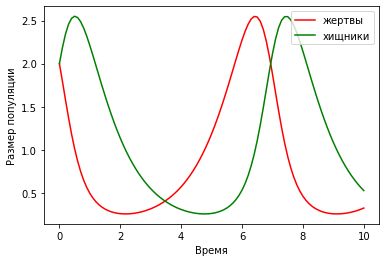

In [4]:
plt.plot(arr[:, 0], arr[:, 1], '-r', label='жертвы')
plt.plot(arr[:, 0], arr[:, 2], '-g', label='хищники')
plt.ylabel('Размер популяции')
plt.xlabel('Время')
plt.legend()

## Системы ОДУ более высоких порядков

Система ОДУ n-го порядка записывается так:

$\vec{s}^{(n)}(t) = \vec{f}(t, \vec{s}, \dot{\vec{s}}, \ddot{\vec{s}}, ... \vec{s}^{(n-1)})$

Такие системы пожно привести к системе ОДУ первого порядка:

$\begin{cases}
\dot{\vec{s}} = \vec{v}_1 \\
\dot{\vec{v}}_1 = \ddot{\vec{s}} = \vec{v}_2 \\
... \\
\dot{\vec{v}}_{n-2} = \vec{s}^{(n-1)} = \vec{v}_{n-1} \\
\dot{\vec{v}}_{n-1} = \vec{f}(t, \vec{s}, \vec{v}_1, \vec{v}_2, ... \vec{v}_{n-1})
\end{cases}$

## Пример - ОДУ второго порядка

[Модель математического маятника](https://ru.wikipedia.org/wiki/Математический_маятник?utm_source=wikipedia):


$\ddot{\theta} + \frac{g}{L} \sin(\theta) = 0$

### Задание

1. Привести уравнение математического маятника к системе уравнений первого порядка и создать функцию правой части в файле `rk_examples.py`
2. Решить задачу Коши:
    - $g, L = 1.0$
    - $\theta_0 = 170^{\circ}$
    - $\dot{\theta}_0 = 0.0$
    - $t_0 = 0.0$
    - $t_1 = 50.0$

$\begin{cases}
\dot{\theta} = \omega \\
\dot{\omega} = -\frac{g}{L} \sin(\theta)
\end{cases}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rk_examples import rk4_nsteps, mp_ode

In [17]:
t0 = 0.
t1 = 50.
n = 1000
h = (t1 - t0) / n
g, L = 1.0, 1.0
mc = np.array([g, L])

s0 = np.array([np.deg2rad(150), 0.])

In [18]:
arr = rk4_nsteps(mp_ode, # правая часть СОДУ Лотки-Вольтерры
                 t0,     # начальный момент времени
                 s0,     # начальный вектор состояния
                 h,      # шаг по времени
                 mc,     # параметры (константы) модели
                 n)      # количество шагов

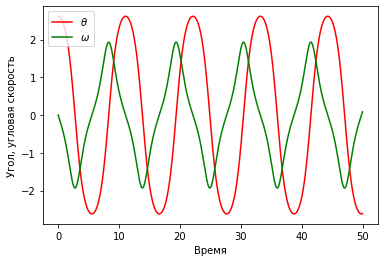

In [19]:
plt.plot(arr[:, 0], arr[:, 1], '-r', label=r'$\theta$')
plt.plot(arr[:, 0], arr[:, 2], '-g', label=r'$\omega$')
plt.ylabel('Угол, угловая скорость')
plt.xlabel('Время')
plt.legend()

## Таблицы Бутчера для методов высоких порядков

[Tracker Component Library | Differential Equations](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/tree/master/Mathematical_Functions/Differential_Equations)

[Один шаг Рунге-Кутты](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)

### Задание

- реализовать один шаг обобщенным методом Рунге-Кутты (на основе таблицы Бутчера $A, b, c$)
- реализовать функцию $n$-шагов обобщенным методом Рунге-Кутты
- сравнить решение задачи Коши для математического маятника для двух случаев:
    - рассмотренную выше (на основе специальной реализации метода РК 4 порядка)
    - реализованную на основе обобщенных функций и таблицы Бутчера, построенной ранее
- перенести таблицу Бутчера для одного из методов 7 или 8 порядка из библиотеки `Tracker Component Library`
    - решить задачу Коши для математического маятника реализованным методом